In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from dataload import *
from model import *
from research import *
from helper_functions import *

DATA

In [3]:
calculer = False

In [4]:
if calculer == False:
  dataframe = pd.read_csv('../data/D1_fullDataWithNotes.csv')
else:
  dataframe = pd.read_csv('../data/D1 10:11.csv')
  for i in range(10, 25):
    d2 = pd.read_csv(f"../data/D1 {i}:{i + 1}.csv")
    dataframe = pd.concat([dataframe, d2])
  dataframe = arrange_data(dataframe, 'FTHG', 'FTAG', 'HA_Scored', 'Total_Goals')

print(f"{dataframe.tail(18).to_string()}\n")

            Date       HomeTeam       AwayTeam  FTHG  FTAG  HA_Scored  Total_Goals      Note
4878  09/05/2025      Wolfsburg     Hoffenheim     2     2          1            4  0.312500
4879  10/05/2025         Bochum          Mainz     1     4          1            5  0.270833
4880  10/05/2025  Holstein Kiel       Freiburg     1     2          1            3  0.312500
4881  10/05/2025   Union Berlin     Heidenheim     0     3          0            3  0.245833
4882  10/05/2025  Werder Bremen     RB Leipzig     0     0          0            0  0.091667
4883  10/05/2025  Bayern Munich     M'gladbach     2     0          0            2  0.362500
4884  11/05/2025     Leverkusen       Dortmund     2     4          1            6  0.245833
4885  11/05/2025  Ein Frankfurt       St Pauli     2     2          1            4  0.141667
4886  11/05/2025      Stuttgart       Augsburg     4     0          0            4  0.208333
4887  17/05/2025       Augsburg   Union Berlin     1     2          1 

In [5]:
if calculer != False:
    arrayEquipes = get_equipes(dataframe, 0, 18, 'HomeTeam', 'AwayTeam')
    print_array_equipes(arrayEquipes)

In [6]:
display(dataframe.dtypes)

Date            object
HomeTeam        object
AwayTeam        object
FTHG             int64
FTAG             int64
HA_Scored        int64
Total_Goals      int64
Note           float64
dtype: object

MODÈLE

In [7]:
if calculer != False:
    dataframe['Note'] = ''
    dataframe = get_notes(dataframe, 'HomeTeam', 'AwayTeam', 'Date', 'Note', 'HA_Scored', 1)

In [8]:
if calculer != False:
    print(f"{dataframe.tail(18).to_string()}\n")

In [9]:
if calculer != False:
    dtcsv = dataframe.to_csv(index=None)
    fichier = open("../data/D1_fullDataWithNotes.csv", "w")
    fichier.write(dtcsv)
    fichier.close()
    print(dtcsv)

RECHERCHE

In [10]:
lenMatchGroups = 9
data = get_data(dataframe, 'HA_Scored', 'Date', 'Note', lenMatchGroups, 42, 43, 1.7, 2, 13, 14, 1)

Note : 0.42
13% à chaque pari
[np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1)]
Sous-résultat : 6/9, 66.66% de réussite
[np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]
Sous-résultat : 7/9, 77.77% de réussite
[np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Sous-résultat : 2/9, 22.22% de réussite
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0)]
Sous-résultat : 6/9, 66.66% de réussite
[np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
Sous-résultat : 8/9, 88.88% de réussite
[np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1)]
Sous-résultat : 4/9, 44.44% de réussite
[np.int64(0), np.int64

1
Note : 0.42


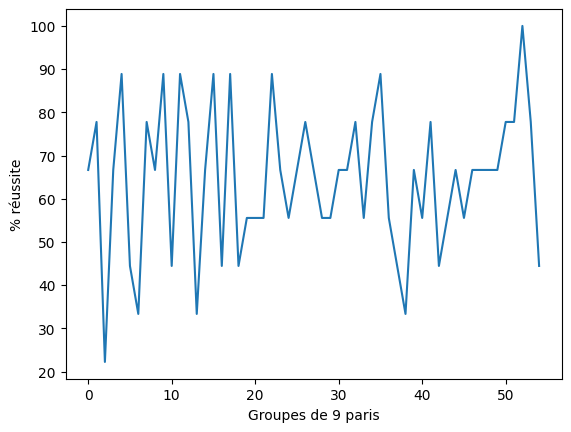

In [11]:
print(len(data))
get_plots(data, lenMatchGroups)